In [5]:
#Installing kaggle
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing kaggle
import kaggle

In [3]:
#download dataset using kaggle api
!kaggle datasets download faviovaz/marketing-ab-testing -f marketing_AB.csv

Dataset URL: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing
License(s): CC0-1.0




  0%|          | 0.00/5.23M [00:00<?, ?B/s]
 19%|#9        | 1.00M/5.23M [00:01<00:06, 639kB/s]
 38%|###8      | 2.00M/5.23M [00:01<00:02, 1.28MB/s]
 57%|#####7    | 3.00M/5.23M [00:02<00:01, 2.00MB/s]
 76%|#######6  | 4.00M/5.23M [00:02<00:00, 2.70MB/s]
 96%|#########5| 5.00M/5.23M [00:02<00:00, 3.33MB/s]
100%|##########| 5.23M/5.23M [00:02<00:00, 2.22MB/s]


In [4]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('marketing_AB.csv.zip')
zip_ref.extractall() #extract file to dir
zip_ref.close() #closing the file

In [8]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Reading the dataset
df = pd.read_csv('marketing_AB.csv', na_values = None)
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [10]:
df.duplicated(subset = 'user id').sum()

0

In [11]:
df.shape

(588101, 7)

In [12]:
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [13]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [14]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]

In [15]:
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [16]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

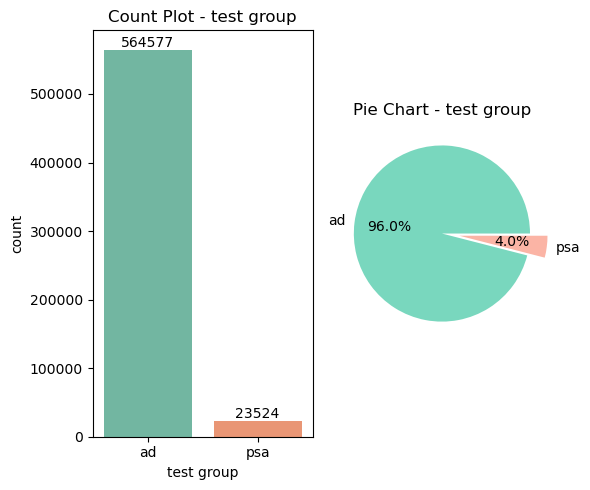

In [111]:
test_group = 'test group'

plt.figure(figsize = (6,5))
#Count Plot
plt.subplot(1,2,1)
ax = sns.countplot(x = test_group, order = df_cat[test_group].value_counts(ascending = False).index, data = df_cat, palette = "Set2")
abs_values = df_cat[test_group].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title(f'Count Plot - {test_group}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[test_group].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.1f%%', explode = [0, 0.2], colors = ['#79D7BE', '#FBB4A5'])
plt.title(f'Pie Chart - {test_group}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

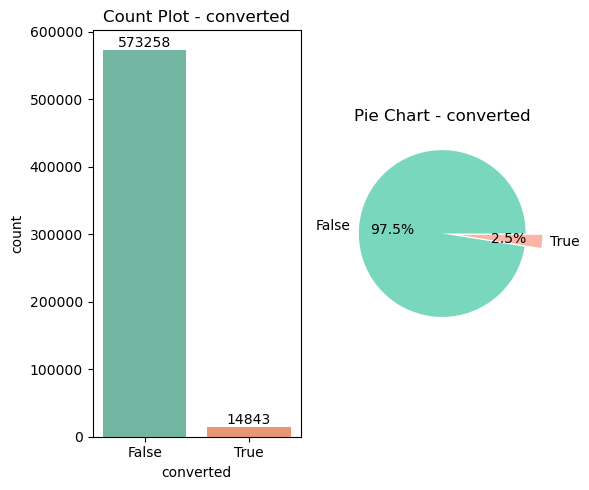

In [112]:
converted = 'converted'

plt.figure(figsize = (6,5))
#Count Plot
plt.subplot(1,2,1)
ax = sns.countplot(x = converted, order = df_cat[converted].value_counts().index, data = df_cat, palette = "Set2")
abs_values = df_cat[converted].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title(f'Count Plot - {converted}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[converted].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.1f%%', explode = [0, 0.2], colors = ['#79D7BE', '#FBB4A5'])
plt.title(f'Pie Chart - {converted}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

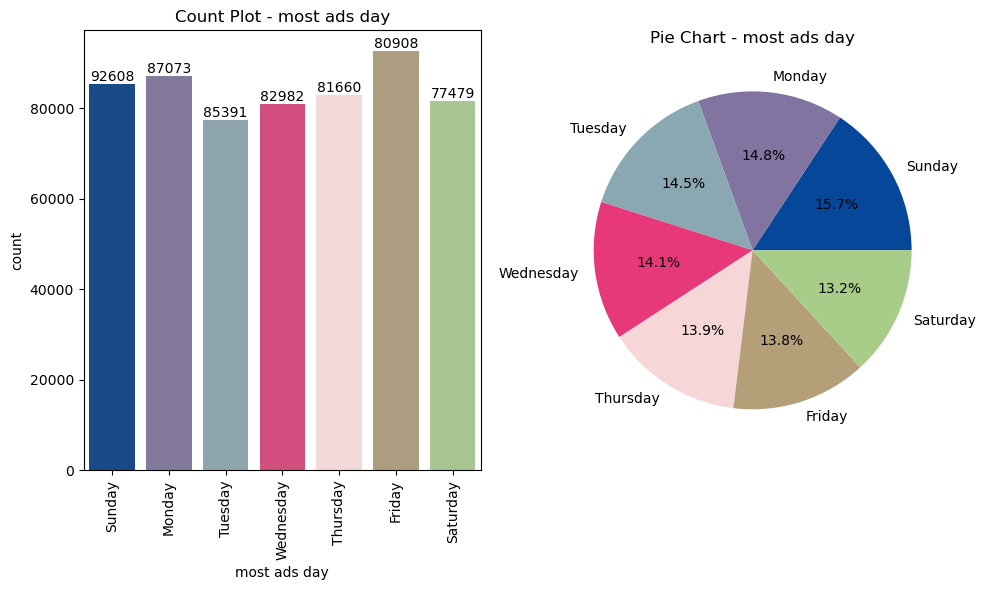

In [113]:
most_ads_day = 'most ads day'

plt.figure(figsize = (10,6))
#Count Plot
plt.subplot(1,2,1)
colors = ["#074799", "#8174A0", "#89A8B2", "#E73879", "#F6D6D6", "#B59F78", "#A8CD89"]
label = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(x = most_ads_day, order = label, data = df_cat, palette = colors)
abs_values = df_cat[most_ads_day].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title(f'Count Plot - {most_ads_day}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[most_ads_day].value_counts()
plt.pie(counts, labels = label, autopct = '%0.1f%%', colors = colors)
plt.title(f'Pie Chart - {most_ads_day}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

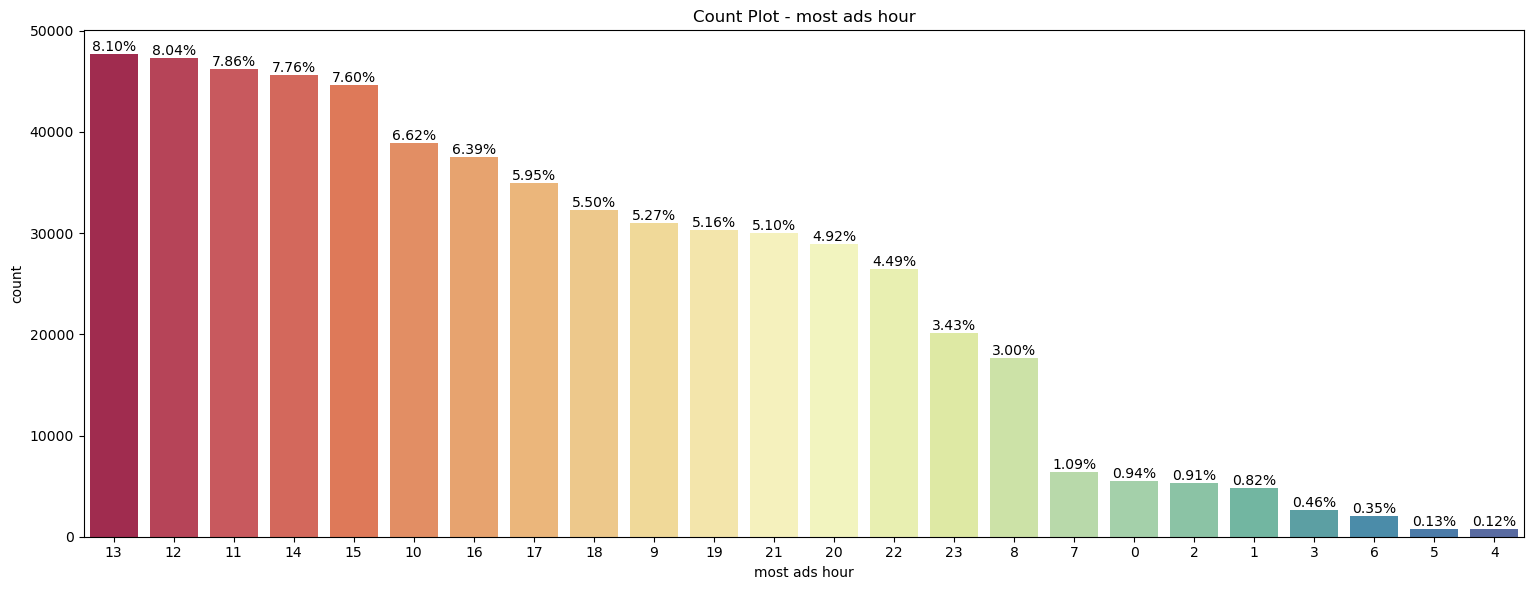

In [114]:
most_ads_hour = 'most ads hour'

plt.figure(figsize = (30,6))
#Count Plot
plt.subplot(1,2,1)
ax = sns.countplot(x = most_ads_hour, order = df_cat[most_ads_hour].value_counts().index, data = df_cat, palette = 'Spectral')

total = len(df_cat)
for p in ax.patches:
    count = p.get_height()
    percentage = (count / total) * 100  # Calculate percentage
    label = f'{percentage:.2f}%'  # Format as "count (percentage%)"
    x = p.get_x() + p.get_width() / 2  # X-coordinate for label
    y = p.get_height()  # Y-coordinate for label
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=10)

plt.title(f'Count Plot - {most_ads_hour}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

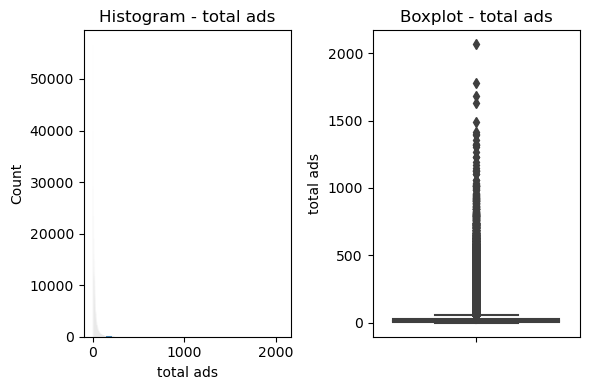

In [115]:
total_ads = 'total ads'
plt.figure(figsize = (6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x = total_ads, data = df)
plt.title(f'Histogram - {total_ads}')

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y = total_ads, data = df)
plt.title(f'Boxplot - {total_ads}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

In [119]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

#### After removing outliers

<function matplotlib.pyplot.show(close=None, block=None)>

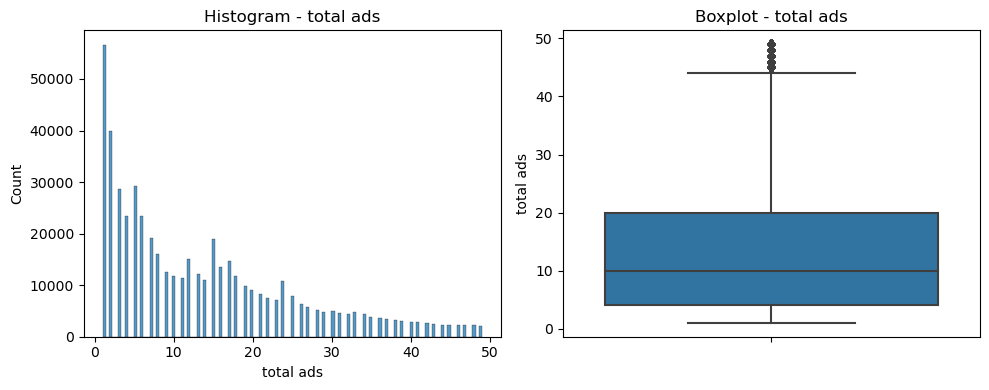

In [123]:
total_ads = 'total ads'
plt.figure(figsize = (10,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x = total_ads, data = df[df[total_ads] < 50])
plt.title(f'Histogram - {total_ads}')

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y = total_ads, data = df[df[total_ads] < 50])
plt.title(f'Boxplot - {total_ads}')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

## Bivariate Analysis
##### Target column = 'converted'

In [125]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group * 100

converted,False,True
test group,,
ad,97.445344,2.554656
psa,98.214589,1.785411


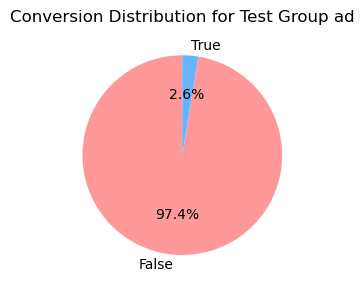

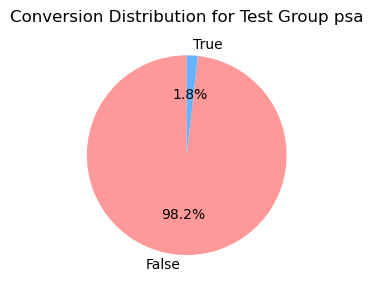

In [143]:
for group in ct_conversion_test_group.index:
    plt.figure(figsize=(3, 3))
    plt.pie(
        ct_conversion_test_group.loc[group],
        labels=ct_conversion_test_group.columns,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff'] 
    )
    plt.title(f'Conversion Distribution for Test Group {group}')
    #Adjust layout
    plt.tight_layout()

    #Show the plots
    plt.show

In [148]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
ct_conversion_day.sort_values(by = True, ascending = False) * 100

converted,False,True
most ads day,,
Monday,96.718845,3.281155
Tuesday,97.015966,2.984034
Wednesday,97.505809,2.494191
Sunday,97.552435,2.447565
Friday,97.778810,2.221190
Thursday,97.842906,2.157094
Saturday,97.894930,2.105070


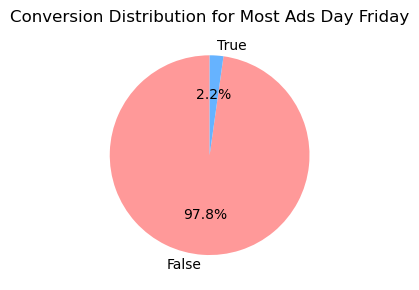

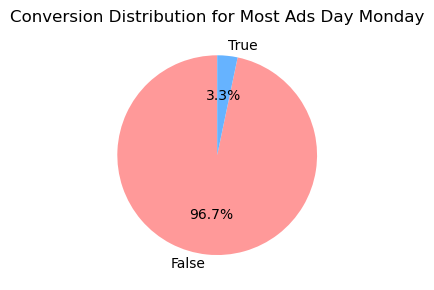

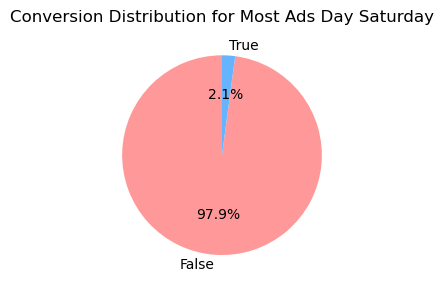

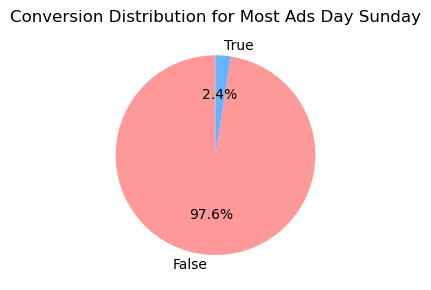

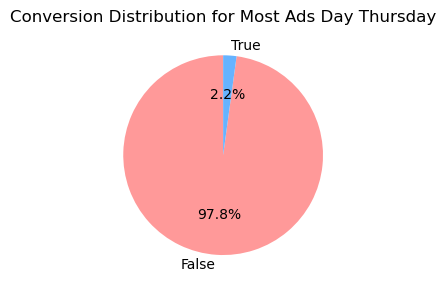

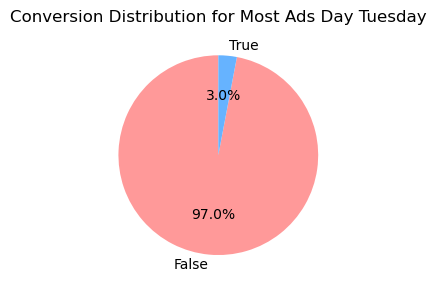

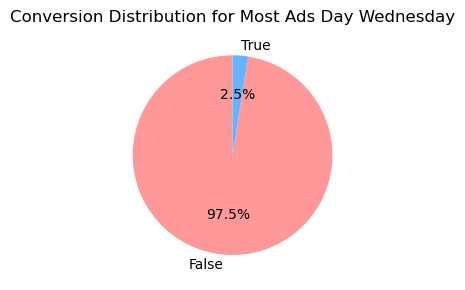

In [147]:
for group in ct_conversion_day.index:
    plt.figure(figsize=(3, 3))
    plt.pie(
        ct_conversion_day.loc[group],
        labels=ct_conversion_day.columns,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff'] 
    )
    plt.title(f'Conversion Distribution for Most Ads Day {group}')
    #Adjust layout
    plt.tight_layout()

    #Show the plots
    plt.show

In [149]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
ct_conversion_hour.sort_values(by = True, ascending = False) * 100

converted,False,True
most ads hour,,
16,96.922831,3.077169
20,97.019673,2.980327
15,97.034666,2.965334
21,97.107686,2.892314
17,97.179033,2.820967
14,97.193743,2.806257
18,97.262012,2.737988
19,97.328018,2.671982
22,97.389528,2.610472


<Axes: xlabel='converted', ylabel='total ads'>

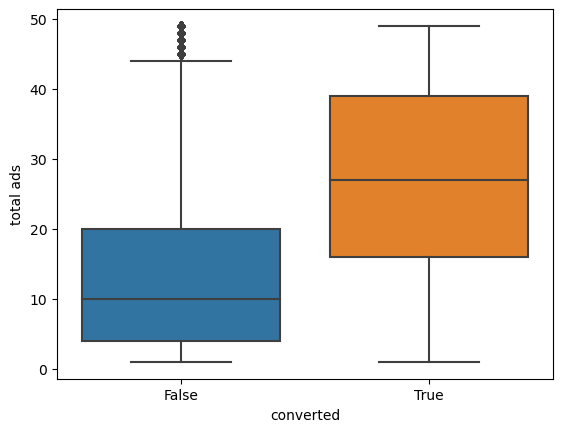

In [150]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50])

## Hypothesis Testing

##### Null Hypothesis - There is no significant difference in conversion rates across other columns.
##### Alternative Hypothesis - The difference in conversion rates across other columns is statistically significant.

In [157]:
import scipy.stats as st

true_conversion_sample = df[df['converted'] == True]['total ads']
false_conversion_sample = df[df['converted'] == False]['total ads']

t_test, p_value = st.ttest_ind(a = true_conversion_sample, b = false_conversion_sample, equal_var = False)
print('T statistic', t_test, 'p_value', p_value)

T statistic 84.17740664633055 p_value 0.0


In [169]:
from scipy.stats import chi2_contingency
alpha = 0.05
for col in df_cat.columns:
    if col != 'converted':
        contingency_table = pd.crosstab(df_cat[col], df_cat['converted'])
        chi2, p_value,_,_ = chi2_contingency(contingency_table)

        #Display the results
        print(f'\nchi-squared test for {col} vs. converted: ')
        print(f'chi-squared value: {chi2}')
        print(f'p_value: {p_value}')
        
        if p_value < alpha:
            print(f'The difference in conversion rates across {col} is statistically significant')
        else:
            print(f'There is no significant difference in conversion rates across {col}')



chi-squared test for test group vs. converted: 
chi-squared value: 54.005823883685245
p_value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant

chi-squared test for most ads day vs. converted: 
chi-squared value: 410.0478857936585
p_value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant

chi-squared test for most ads hour vs. converted: 
chi-squared value: 430.76869230822086
p_value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant
